# Chapter 4

### Exploring Data with Graphs

In [9]:
import pandas as pd
import seaborn as sns

In [3]:
DATA_URLS = {
    'Facebook': 'https://studysites.uk.sagepub.com/dsur/study/DSUR%20Data%20Files/Chapter%204/FacebookNarcissism.dat',
    
}


df_fb = pd.read_csv(DATA_URLS['Facebook'], sep='\t')

In [4]:
df_fb.head()

,id,NPQC_R_Total,Rating_Type,Rating
0,1,31.0,Attractive,2
1,1,31.0,Fashionable,2
2,1,31.0,Glamourous,2
3,1,31.0,Cool,2
4,2,37.0,Attractive,2


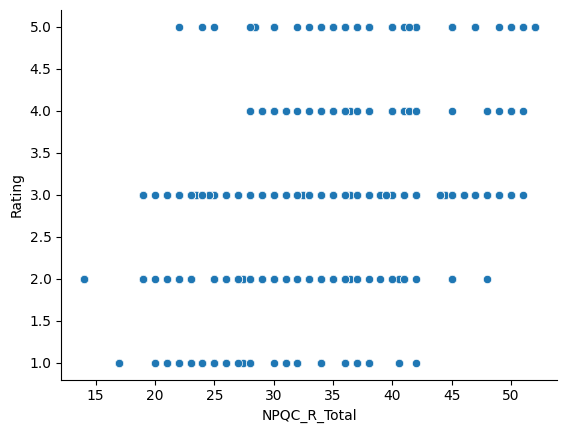

In [14]:
sns.scatterplot(x='NPQC_R_Total', y='Rating', data=df_fb)
sns.despine()

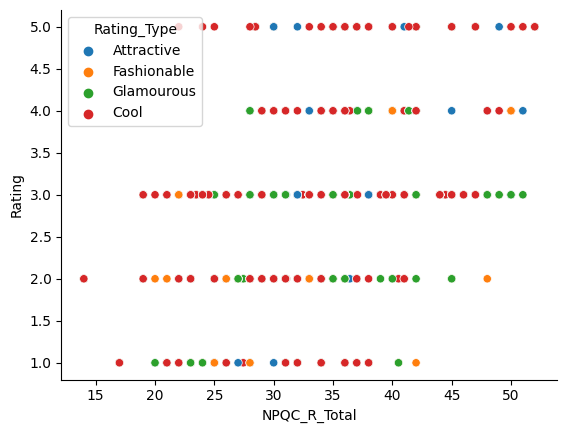

In [17]:
sns.scatterplot(x='NPQC_R_Total', y='Rating', data=df_fb, hue='Rating_Type')
sns.despine()

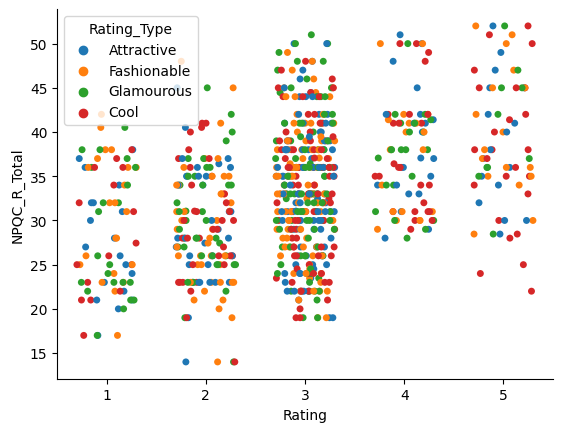

In [32]:
# Add in jitter for the plot

sns.stripplot(y='NPQC_R_Total', x='Rating', data=df_fb, hue='Rating_Type', jitter=.3)
sns.despine()